In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip list

Things to learn :: <br>
1)plotly.express as px graphical tool just as matplotlib or seaborne <br>
2) read_csv has names attribute which names the columns

In [ ]:
import pandas as pd
import plotly.express as px
import math
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from typing import Dict, List

In [ ]:
TRAIN_PATH = "/content/data/raw/train2.tsv"
TEST_PATH = "/content/data/raw/test2.tsv"
VAL_PATH = "/content/data/raw/val2.tsv"

In [ ]:
columns = ["id", "statement_json", "label", "statement", "subject", "speaker", "speaker_title", "state_info", "party_affiliation", "barely_true_count", "false_count", "half_true_count", "mostly_true_count", "pants_fire_count", "context", "justification"]
train_df = pd.read_csv(TRAIN_PATH, sep = "\t", names = columns)
val_df = pd.read_csv(VAL_PATH, sep="\t", names = columns)
test_df = pd.read_csv(TEST_PATH, sep="\t", names = columns)

In [ ]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 500

In [ ]:
len(train_df)

10242

In [ ]:
len(val_df)

1284

In [ ]:
len(test_df)

1267

In [ ]:
train_df.columns

Index(['id', 'statement_json', 'label', 'statement', 'subject', 'speaker',
       'speaker_title', 'state_info', 'party_affiliation', 'barely_true_count',
       'false_count', 'half_true_count', 'mostly_true_count',
       'pants_fire_count', 'context', 'justification'],
      dtype='object')

In [ ]:
train_df.head()

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification
0,0.0,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,"That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."
1,1.0,10540.json,half-true,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started when natural gas took off That started to begin in President (George W. ) Bushs administration. ""No doubt, natural gas has been gaining ground on coal in generating electricity. The trend started in the 1990s but clearly gained speed during the Bush administration when the production of natural gas -- a competitor of coal -- picked up. But analysts give little credit or blame to Bush for that trend. They note that other factors, such as technologic..."
2,2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,"Obama said he would have voted against the amendment if he had been present. So though Clinton may have ""agreed"" with McCain on the issue, they did not technically vote the same way on it. To say that voting for Kyl-Lieberman is ""giving George Bush the benefit of the doubt on Iran"" remains a contentious issue. But Obama's main point is that Clinton and McCain were on the same side, and that is correct."
3,3.0,1123.json,false,Health care reform legislation is likely to mandate free sex change surgeries.,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,"The release may have a point that Mikulskis comment could open the door to ""medically necessary"" coverage which conceivably may include sex-change operations. But it's unclear whether her amendment will remain in the legislation, and there's nothing specific in the legislation on sex-change procedures and nothing else solid that indicates such coverage will be provided. The news release cherry-picked a few fleeting references to gender and sexual orientation in completely unrelated contexts ..."
4,4.0,9028.json,half-true,The economic turnaround started at the end of my term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround started at the end of my term. ""During Crists last year in office, Floridas economy experienced notable gains in personal income and industrial production, and more marginal improvements in the unemployment rate and in payroll employment. But GDP didnt grow again until Scott took office. Economists say Crist deserves some credit for the economic turnaround because he accepted federal stimulus dollars, but they add that any state is inevitably buffeted..."


 3) Search for Violin Plot characteristics

<ipython-input-73-d01527d46dc6>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




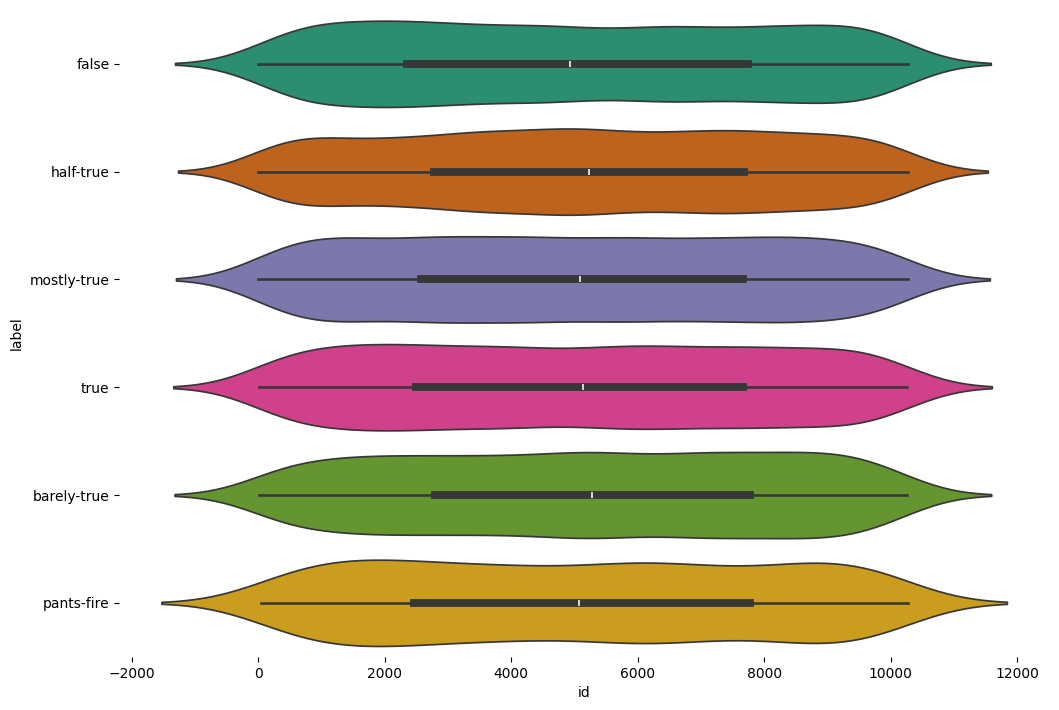

In [ ]:
# @title label vs id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_df['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_df, x='id', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***dropna drops rows where cells in the specified column has null atributed values.***

In [ ]:
train_df.dropna(subset=["label"], inplace=True)

In [ ]:
len(train_df)

10240

***value_counts return frequency of each unique value in a specific column. Normalize divides by total number of not-null values.***

In [ ]:
label_ratios = train_df.label.value_counts(normalize=True)

In [ ]:
px.bar(label_ratios, x = label_ratios.index, y = label_ratios.values, labels={"index": "label", "y": "ratios"}, title="Label Distribution")

4) *column.nunique returns number of unique values in that column*

In [ ]:
train_df.speaker_title.nunique()

1183

In [ ]:
train_df.speaker_title[train_df.speaker_title.notnull()]

0                                 State representative
1                                       State delegate
2                                            President
5                           Wisconsin Assembly speaker
7                                            President
                             ...                      
10230                                  President-Elect
10232                                          Senator
10233                      State Senator, 8th District
10234                      Senior editor, The Atlantic
10241    chairman of the Republican National Committee
Name: speaker_title, Length: 7342, dtype: object

In [ ]:
train_df.speaker_title.value_counts()[:20]

speaker_title
President                        492
U.S. Senator                     479
Governor                         391
President-Elect                  273
U.S. senator                     263
Presidential candidate           254
Former governor                  176
U.S. Representative              172
Milwaukee County Executive       149
Senator                          147
State Senator                    108
U.S. representative              103
U.S. House of Representatives    102
Attorney                          81
Congressman                       80
Governor of New Jersey            78
Social media posting              78
Co-host on CNN's "Crossfire"      73
State Representative              72
State representative              66
Name: count, dtype: int64

In [ ]:
train_df.speaker.value_counts()

speaker
barack-obama                                   488
donald-trump                                   273
hillary-clinton                                239
mitt-romney                                    176
scott-walker                                   149
                                              ... 
lorraine-fende                                   1
nfederation-o-independent-business-virginia      1
jim-moore                                        1
scott-surovell                                   1
alan-powell                                      1
Name: count, Length: 2910, dtype: int64

In [ ]:
affiliation_counts = train_df.party_affiliation.value_counts()
px.bar(affiliation_counts, x=affiliation_counts.index, y=affiliation_counts.values, labels={"index": "affiliation", "y": "counts"}, title="Counts Per Affiliation")

In [ ]:
def get_binary_label(label: str) -> bool:
  if label in {"pants-fire", "barely-true", "false"}:
    return False
  elif label in {"true", "half-true", "mostly-true"}:
    return True

***DEFINE A FUNCTION. Then you can apply to every value of a particular column by doing column.apply(function name)***

In [ ]:
train_df["binary_label"] = train_df.label.apply(get_binary_label)

***groupby returns a different type of object or groupby object, not a dataframe. it has function get_group that returns dataframe with that particular group in that column.***

In [ ]:
party_groups = train_df.groupby(["party_affiliation"])

In [ ]:
party_groups.get_group("republican").binary_label.value_counts(normalize=True)

binary_label
True     0.50189
False    0.49811
Name: proportion, dtype: float64

In [ ]:
party_groups.get_group("democrat").binary_label.value_counts(normalize=True)

binary_label
True     0.66217
False    0.33783
Name: proportion, dtype: float64

In [ ]:
train_df.binary_label.value_counts(normalize=True)

binary_label
True     0.561719
False    0.438281
Name: proportion, dtype: float64

***First split a string into words which are separated by whitespace, and then do len to count the number of words in the statement.***

In [ ]:
unigram_lens = train_df.statement.str.split().str.len()

In [ ]:
unigram_lens

0        11
1        24
2        19
3        12
4        10
         ..
10237    17
10238    14
10239    28
10240    11
10241    30
Name: statement, Length: 10240, dtype: int64

In [ ]:
px.histogram(unigram_lens, x = unigram_lens.values, labels={"x": "unigram lens"}, title="Unigram Length Distribution")

In [ ]:
print(unigram_lens.median())
print(unigram_lens.mean())
print(unigram_lens.max())

17.0
18.030859375
479


In [ ]:
train_df[train_df.pants_fire_count == "a television interview"]

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification,binary_label


In [ ]:
train_df.drop(6134, inplace=True)

In [ ]:
# Separate true samples from false ones
true_ex = train_df[train_df.binary_label == True]
false_ex = train_df[train_df.binary_label == False]

In [ ]:
train_df.pants_fire_count.describe()

count    10237.000000
mean         6.201231
std         16.129705
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max        105.000000
Name: pants_fire_count, dtype: float64

In [ ]:
# TODO (mihail): Include feature for credit history counts (binned)
barely_true_counts = train_df.barely_true_count.value_counts().sort_index()
px.bar(barely_true_counts, x=barely_true_counts.index, y=barely_true_counts.values, labels={"index": "credit", "y": "counts"}, title="Barely True Credit Distribution")

In [ ]:
px.histogram(train_df, x="barely_true_count", labels={"x": "credit score"}, title="Barely True Credit Histogram", nbins=10)

In [ ]:
barely_true_counts.values

array([3025, 1512,  815,  489,  236,  317,  190,  236,  171,  246,  104,
        289,  112,   49,  115,   70,   69,   63,  134,   56,  149,  115,
        142,  148,  117,  176,   92,  239,  273,  488])

***Describe function gives the following details***

In [ ]:
train_df.false_count.describe()

count    10237.000000
mean        13.284556
std         24.113327
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        114.000000
Name: false_count, dtype: float64

In [ ]:
train_df.half_true_count.describe()

count    10237.000000
mean        17.133926
std         35.848256
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        160.000000
Name: half_true_count, dtype: float64

In [ ]:
train_df.mostly_true_count.describe()

count    10237.000000
mean        16.434014
std         36.153445
min          0.000000
25%          0.000000
50%          3.000000
75%         11.000000
max        163.000000
Name: mostly_true_count, dtype: float64

In [ ]:
train_df.pants_fire_count.astype(float).describe()

count    10237.000000
mean         6.201231
std         16.129705
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max        105.000000
Name: pants_fire_count, dtype: float64

In [ ]:
true_ex.statement.str.split().str.len().describe()

count    5751.000000
mean       18.455921
std        10.318785
min         2.000000
25%        13.000000
50%        17.000000
75%        23.000000
max       479.000000
Name: statement, dtype: float64

In [ ]:
false_ex.statement.str.split().str.len().describe()

count    4488.000000
mean       17.488191
std         9.371839
min         2.000000
25%        12.000000
50%        16.000000
75%        22.000000
max       317.000000
Name: statement, dtype: float64

***In pandas, the sample() function is used to randomly sample data from a DataFrame. .head(25): This method is called to display the first 25 rows of the sampled DataFrame.***

In [ ]:
true_ex.sample(frac=0.2).head(15)

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification,binary_label
9265,9293.0,1840.json,mostly-true,"The Interior Department has only 30 days to review an exploration plan submitted by an oil company. That leaves no time for the appropriate environmental review. The result is, they are continually waived.","energy,environment,oil-spill",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference at the White House,"That's for the entire year. Kucinich is correct that the Great Lakes compact allows water to be removed in small containers. But experts appear skeptical that that ""loophole"" will have a serious impact.",True
5898,5910.0,2597.json,mostly-true,Georgia lawmakers balanced the budget without raising taxes on residents.,taxes,casey-cagle,NaN,NaN,republican,1.0,0.0,0.0,2.0,0.0,a speech,"But he errs on several fronts. The latest cost projection from the Texas health commission is $27 billion, not $30 billion; the estimate covers 2014 through 2023, not the next 10 years; and it speaks only to a single state entity, not all of state government.",True
7591,7619.0,11511.json,mostly-true,"If you look at the three people on the (debate) stage from the United States Senate, all three of them have a combined two bills that became law that theyve sponsored.","candidates-biography,congress,corrections-and-updates",jeb-bush,NaN,Florida,republican,17.0,5.0,17.0,24.0,2.0,"comments on ""Meet the Press""","Also, the e-mail says Obama would ""stand with the Muslims should the political winds shift in an ugly direction,"" implying he made a statement to that effect. But it's clear in reading the text that the words actually represent a question Obama is being asked by his audiences: ""they need specific assurances . . . that I will stand with them should the political winds shift in an ugly direction. ""Though Obama doesn't say so explicitly, he gives the impression his answer is yes. The e-mail dis...",True
2720,2732.0,11029.json,true,Greece is not a big economy. Its about the size of metropolitan Miami.,"economy,foreign-policy",paul-krugman,New York Times columnist,NaN,none,0.0,2.0,3.0,4.0,0.0,"an interview on ABC's ""This Week with George Stephanopoulos""","Rep. Edith H. Ajello said, ""Lots of studies seem to indicate that minors find it very easy to get marijuana, easier than to get alcohol. ""The verb choice and timing of Ajellos comment proved crucial here. If shed referred to how easily young people could purchase one or the other, and shed said it in 2009, there would be more support. But all the most recent, credible, national studies we found showed that teenagers report its easier to get alcohol than marijuana.",True
9459,9486.0,4761.json,half-true,"Under President Barack Obama, more Americans are in poverty ... than at any time since the Census Bureau began keeping records on it over 50 years ago.","history,poverty",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,16.0,15.0,20.0,10.0,11.0,a written opening statement for a debate,"""Whatever it is called, presidents are always reviewing regulations to eliminate ones that impose unnecessary burdens. ""In fact, a U. S. Government Accountability Office report on July 16, 2007, states that, ""Every president since President Carter has directed agencies to evaluate or reconsider existing regulations. ""Lots of presidents have done that.",True
641,641.0,2647.json,mostly-true,"Carly Fiorina, shes against banning assault weapons.","guns,message-machine",barbara-boxer,U.S. Senator,California,democrat,2.0,0.0,3.0,4.0,1.0,a campaign ad,"The NRA said it endorses her because she ""opposes re-enacting the Clinton gun and magazine ban. ""In ruling on the statement ""Carly Fiorina, she's against banning assault weapons,"" we find it compelling that she opposed the 1994 ban and thatthe NRA said she told them s

In [ ]:
false_ex.sample(frac=0.2).head(15)

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification,binary_label
397,397.0,5740.json,barely-true,Says the treasurers office has saved $37 million in management costs for the oversight of public investments.,government-efficiency,ted-wheeler,NaN,NaN,democrat,1.0,0.0,0.0,0.0,0.0,campaign website,"A third-party report showed that Oregon paid $39 million less in fees than its peers. But just because a peer group spent more than Oregon doesnt mean Oregon was ever at risk of spending that much. Moreover, a key reason for our lower-than-peer-average fees is that our private investments are older, a crop of decisions that have nothing to do with Wheeler. These are critical facts that would give a different impression of the savings statement.",False
8747,8775.0,2768.json,false,"If all of the [Bush-era] tax cuts expire on schedule, the budget will be close to being balanced in four years.","deficit,federal-budget,taxes",bobby-scott,U.S. Congressman,Virginia,democrat,1.0,2.0,1.0,5.0,0.0,a statement in the Times-Dispatch voters' guide,"The data comes from the department's annual statistical reports. The reports on the Revenue Department's Web site, however, only go back to 2000. The Revenue Department has reports that date to 1997 with annual low-income credit figures in its north DeKalb County offices. But Thurmond's website gives him some serious wiggle room by saying ""more than $250 million in tax relief.",False
3537,3549.0,4322.json,false,Says Gov. Rick Scott is spending a quarter of a million of our tax dollars to robocall people.,state-budget,florida-voter,NaN,Florida,none,0.0,1.0,0.0,1.0,0.0,"a robocall from the Pink Slip Rick website, played on MSNBC's ""Rachel Maddow"" show.","Those in charge of overseeing New Hampshires elections and investigating election complaints said any instances of voter fraud in the state have historically been extremely rare. The most recent election was no exception, with no complaints of voter fraud filed in an election in which more than 728,000 ballots were cast.",False
6166,6185.0,4075.json,false,Says legislative debate of airport pat-down procedures initiated federal changes in security procedures.,"homeland-security,transportation",rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,a press release,"She said, ""Atwater's bank was so weak that just a few months ago it was shut down by the FDIC. ""At the time, it wasn't Atwater's bank. It may have been his former bank, or best yet, it was a bank where he used to work as an executive vice president.",False
9928,9955.0,4494.json,pants-fire,The federal government has not engaged in (border security) at all.,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,in the Fox News Google debate in Orlando,"Our rating Tate declared that a Republican budget proposal ""would have Wisconsin have the weakest standards for who can be a teacher in the classroom in the country. ""If the proposal becomes law, Wisconsin apparently would become the only state not to have a bachelors degree as a minimum requirement for teaching some subjects, including health and foreign languages. But that applies only to sixth through 12th grades.",False
9633,9660.0,13442.json,pants-fire,"Says that at a campaign rally President Barack Obama spent so much time screaming at a protester, and frankly it was a disgrace.",elections,donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,"a rally in Hershey, Pa.","But that designation in 1994 and earlier didnt stop the kind of ""cheating"" Romneys talking about. Meanwhile, the ad makes it sound as though Obama ""refused"" to take on China over unfair trade practices. The administration hasnt done as much as some on the right and left have demanded, but among other things it has filed seven trade cases with the WTO with more coming and engaged in d

***strip all the leading and trailing whitespaces of the specific colunn with str.strip()***

In [ ]:
stripped = false_ex.state_info.copy().str.strip()
false_ex.loc[:, "state_info"] = stripped

stripped = true_ex.state_info.copy().str.strip()
true_ex.loc[:, "state_info"] = stripped

In [ ]:
# Clean up the variants of state info
CANONICAL_TO_VARIANTS = {
    "Tennessee": {"Tennessee", "Tennesse"},
    "Washington D.C.": {"District of Columbia", "Washington D.C.", "Washington, D.C.", "Washington DC"},
    "Texas": {"Tex", "Texas"},
    "Washington": {"Washington", "Washington state"},
    "Virginia": {"Virginia", "Virgina", "Virgiia"},
    "Pennsylvania": {"Pennsylvania", "PA - Pennsylvania"},
    "Rhode Island": {"Rhode Island", "Rhode island"},
    "Ohio": {"Ohio", "ohio"}
}

In [ ]:
def get_variant_to_canonical(can_to_var: Dict):
    variant_to_canonical = {}
    for canonical, variant in can_to_var.items():
      for var in variant:
        variant_to_canonical[var] = canonical
    return variant_to_canonical

variant_to_canonical = get_variant_to_canonical(CANONICAL_TO_VARIANTS)

***lambda x is itself a one-line function that takes parameter x as argument. whatever is on RHS of : is its inside here another function***

In [ ]:
def clean_variant(state_info, variant_to_canonical):
  if state_info in variant_to_canonical.keys():
    return variant_to_canonical[state_info]
  return state_info

true_ex.loc[:, "state_info"] = true_ex.state_info.apply(lambda x: clean_variant(x, variant_to_canonical))
false_ex.loc[:, "state_info"] = false_ex.state_info.apply(lambda x: clean_variant(x, variant_to_canonical))

In [ ]:
state_true_counts = true_ex.state_info.value_counts()
px.bar(state_true_counts, x=state_true_counts.index, y=state_true_counts.values, labels={"index": "state", "y": "counts"}, title="True Statement State Distribution")

In [ ]:
state_false_counts = false_ex.state_info.value_counts()
px.bar(state_false_counts, x=state_false_counts.index, y=state_false_counts.values, labels={"index": "state", "y": "counts"}, title="False Statement State Distribution")

***Learn CoutVectorizer from sklearn online. Bag of words is num_lines * all_word_frequency matrix, index of a particular word can be found from vectorizer.vocabulary_.items() method. Learn ngrams online, (stretch of words selected) ***

In [ ]:
def get_top_ngrams(corpus, ngram_len: int=1, num: int=None) -> List:
  vec = CountVectorizer(ngram_range=(ngram_len, ngram_len), stop_words = 'english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:num]

In [ ]:
top_unigrams_true = get_top_ngrams(true_ex.statement, 1, 30)
top_unigrams_true

[('says', 1216),
 ('percent', 839),
 ('state', 513),
 ('000', 466),
 ('year', 398),
 ('tax', 386),
 ('years', 381),
 ('states', 359),
 ('million', 357),
 ('obama', 338),
 ('people', 336),
 ('health', 305),
 ('president', 291),
 ('jobs', 289),
 ('new', 268),
 ('texas', 244),
 ('care', 234),
 ('taxes', 229),
 ('billion', 224),
 ('country', 224),
 ('federal', 208),
 ('united', 202),
 ('said', 194),
 ('budget', 190),
 ('rate', 186),
 ('pay', 177),
 ('voted', 177),
 ('10', 176),
 ('time', 172),
 ('government', 165)]

In [ ]:
true_state_distr = pd.DataFrame(top_unigrams_true, columns=["unigram", "count"])
px.bar(true_state_distr, x="unigram", y="count", title="Top True Unigrams Frequency")

In [ ]:
top_unigrams_false = get_top_ngrams(false_ex[false_ex.statement.notnull()].statement.str.lower(), num=30)
false_state_distr = pd.DataFrame(top_unigrams_false, columns=["unigram", "count"])
px.bar(false_state_distr, x="unigram", y="count", title="Top False Unigrams Frequency")

In [ ]:
top_bigrams_false = get_top_ngrams(false_ex[false_ex.statement.notnull()].statement.str.lower(), ngram_len=2, num=30)
false_state_distr = pd.DataFrame(top_bigrams_false, columns=["bigram", "count"])
px.bar(false_state_distr, x="bigram", y="count", title="Top False Bigrams Frequency")

In [ ]:
top_bigrams_true = get_top_ngrams(true_ex[true_ex.statement.notnull()].statement.str.lower(), ngram_len=2, num=30)
true_state_distr = pd.DataFrame(top_bigrams_true, columns=["bigram", "count"])
px.bar(true_state_distr, x="bigram", y="count", title="Top True Bigrams Frequency")

In [ ]:
true_ex.statement.str.split().str.len().describe()

count    5751.000000
mean       18.455921
std        10.318785
min         2.000000
25%        13.000000
50%        17.000000
75%        23.000000
max       479.000000
Name: statement, dtype: float64

In [ ]:
false_ex.statement.str.split().str.len().describe()

count    4488.000000
mean       17.488191
std         9.371839
min         2.000000
25%        12.000000
50%        16.000000
75%        22.000000
max       317.000000
Name: statement, dtype: float64

In [ ]:
train_df.statement.str.split().str.len().describe()

count    10239.000000
mean        18.031741
std          9.926004
min          2.000000
25%         12.000000
50%         17.000000
75%         22.000000
max        479.000000
Name: statement, dtype: float64

In [ ]:
def print_topics(model: TruncatedSVD, vectorizer: TfidfVectorizer, top_n: int=10) -> None:
  for idx, topic in enumerate(model.components_):
    print("Topic %d: " % (idx))
    print([(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])
    print("\n")

def run_lsa_and_print_topics(df: pd.DataFrame, num_topics: int=5, num_words: int=5) -> None:
  tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', use_idf = True, smooth_idf = True)
  lsa_model = TruncatedSVD(n_components = num_topics)
  tfidf_transformed = tfidf_vectorizer.fit_transform(df.statement)
  lsa_transform = lsa_model.fit_transform(tfidf_transformed)
  print_topics(lsa_model, tfidf_vectorizer)


In [ ]:
run_lsa_and_print_topics(true_ex)

Topic 0: 
[('percent', 0.34365886323176853), ('says', 0.3014539900910456), ('tax', 0.17625146664855085), ('000', 0.17525748523590642), ('state', 0.17490032860768573), ('years', 0.16249611894931945), ('year', 0.15978338223601965), ('health', 0.15295273286858885), ('jobs', 0.15154022175354118), ('obama', 0.15095141481724134)]


Topic 1: 
[('percent', 0.7140668224605929), ('rate', 0.14380209485251413), ('income', 0.11154039165207252), ('unemployment', 0.08677133363410074), ('40', 0.07835297716506294), ('highest', 0.0695667426248471), ('90', 0.05491096944150093), ('10', 0.05188182759646851), ('states', 0.04922356933623877), ('pay', 0.04765142488643022)]


Topic 2: 
[('health', 0.6142773248685527), ('care', 0.5067072449982734), ('insurance', 0.22363242714937653), ('percent', 0.15540691162097447), ('americans', 0.0917444053156239), ('plan', 0.08798888176601243), ('people', 0.08155811520002532), ('reform', 0.07614622152467995), ('coverage', 0.06638817118485459), ('law', 0.061964141216471355)]

In [ ]:
run_lsa_and_print_topics(false_ex)

Topic 0: 
[('says', 0.3716295298398604), ('health', 0.2585918333317766), ('obama', 0.24433481221139478), ('care', 0.23833260294406386), ('president', 0.20452341540219185), ('percent', 0.18166456484781623), ('barack', 0.18101375250601584), ('tax', 0.18073563233100132), ('state', 0.15352315597884464), ('000', 0.13402476683054593)]


Topic 1: 
[('health', 0.5350736485220289), ('care', 0.5081839121380584), ('law', 0.16036660177025633), ('insurance', 0.12020647280019874), ('government', 0.09775124163117661), ('reform', 0.07599792024571048), ('plan', 0.05393973151725916), ('affordable', 0.05261193907309096), ('federal', 0.05138550787840349), ('takeover', 0.05020922443378132)]


Topic 2: 
[('obama', 0.4297613183110935), ('barack', 0.3625309644065311), ('president', 0.35574805766283785), ('health', 0.24984047360016365), ('care', 0.23943718698092406), ('obamas', 0.07416435330708715), ('law', 0.06567394934951139), ('muslim', 0.047761124674434), ('government', 0.04343639556135951), ('going', 0.03

In [ ]:
run_lsa_and_print_topics(true_ex, num_topics=10, num_words=8)

Topic 0: 
[('percent', 0.3436323640080215), ('says', 0.301445141709043), ('tax', 0.17624157802907994), ('000', 0.1751950566616789), ('state', 0.17490107162393292), ('years', 0.16255199361911304), ('year', 0.15999043468805402), ('health', 0.1529475351719705), ('jobs', 0.15161582689293288), ('obama', 0.15088592255042946)]


Topic 1: 
[('percent', 0.7156427692489826), ('rate', 0.13506817594519618), ('income', 0.1144947027892323), ('unemployment', 0.08222847231438644), ('40', 0.07785847965406731), ('highest', 0.06511303174269241), ('90', 0.05540744245929783), ('10', 0.05304632632052616), ('pay', 0.05243834402740241), ('states', 0.05120009472029188)]


Topic 2: 
[('health', 0.6127558921764125), ('care', 0.5149787283088898), ('insurance', 0.2079046581755199), ('percent', 0.17492317889057835), ('plan', 0.0947356004771294), ('americans', 0.09271058872883957), ('reform', 0.07646733225409307), ('law', 0.06922197690859858), ('coverage', 0.06606918535160154), ('people', 0.06256869250670691)]


Top

In [ ]:
run_lsa_and_print_topics(false_ex, num_topics=10, num_words=8)

Topic 0: 
[('says', 0.3716600900944513), ('health', 0.2586232651783615), ('obama', 0.24437234218678325), ('care', 0.23830687681912935), ('president', 0.20442530931130778), ('percent', 0.18173728390151375), ('barack', 0.18104869198149404), ('tax', 0.18081235856665118), ('state', 0.1534178720587333), ('000', 0.13397391791148933)]


Topic 1: 
[('health', 0.5355904255668226), ('care', 0.5091066246089576), ('law', 0.1595257686969578), ('insurance', 0.1192151005869636), ('government', 0.09654055012663408), ('reform', 0.07643417675581841), ('plan', 0.05594020696262338), ('affordable', 0.05283670733929387), ('takeover', 0.05013713080448965), ('federal', 0.04910462984812852)]


Topic 2: 
[('obama', 0.4315331799263446), ('barack', 0.3643249308791459), ('president', 0.3560833232867857), ('health', 0.2542460386388046), ('care', 0.241266501045214), ('obamas', 0.073317568616281), ('law', 0.06359684982892312), ('muslim', 0.04831300282624229), ('insurance', 0.03917870022482461), ('going', 0.0329284656

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
def extract_compound_sentiment(statement: str) -> float:
    return analyzer.polarity_scores(text=statement)["compound"]

def extract_pos_sentiment(statement: str) -> float:
    return analyzer.polarity_scores(statement)["pos"]

def extract_neg_sentiment(statement: str) -> float:
    return analyzer.polarity_scores(statement)["neg"]

def extract_neu_sentiment(statement: str) -> float:
    return analyzer.polarity_scores(statement)["neu"]

In [ ]:
true_compound = true_ex.statement.apply(lambda x: extract_compound_sentiment(x))
px.histogram(true_compound, x=true_compound.values, labels={"x": "polarity"}, title="True Compound Polarity")

In [ ]:
true_compound.describe()

count    5751.000000
mean       -0.019395
std         0.395429
min        -0.974400
25%        -0.296000
50%         0.000000
75%         0.250000
max         0.942300
Name: statement, dtype: float64

In [ ]:
true_pos = true_ex.statement.apply(lambda x: extract_pos_sentiment(x))
true_neg = true_ex.statement.apply(lambda x: extract_neg_sentiment(x))
false_compound = false_ex.statement.apply(lambda x: extract_compound_sentiment(x))
false_pos = false_ex.statement.apply(lambda x: extract_pos_sentiment(x))
false_neg = false_ex.statement.apply(lambda x: extract_neg_sentiment(x))

In [ ]:
px.histogram(false_compound, x=false_compound.values, labels={"x": "polarity"}, title="False Compound Polarity")

In [ ]:
# describe each of them above